In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
plt.style.use('seaborn')
%matplotlib notebook

In [42]:
df = pd.read_csv('FLO_L3_20170502.csv', skiprows=[1])

# filters out all the values that are -9999
df.replace(-9999, np.NaN, inplace=True)
# df.dropna(axis=1, inplace=True)
# df.dropna(axis=0)
boundary = [43.72522494585236, 43.71765505414764, -70.14282096730264, -70.152488872116109]

In [43]:
# df.columns

In [44]:
df = df[['Lat', 'Lon', 'secDay', 'Water temp (C)', 'Salinity (PSU)', 'O2 umol/L', 'Chl a (mg/m3)', 'sw pCO2 (uatm)']]
# y_data = df['sw pCO2 (uatm)']

# removes outliers
df = df[(df['sw pCO2 (uatm)'] > 100) & 
        (df['sw pCO2 (uatm)'] < 600)]

# bounds df to 300m from the kelp farm
df = df[(df['Lat'] < boundary[0]) & 
        (df['Lat'] > boundary[1]) & 
        (df['Lon'] < boundary[2]) & 
        (df['Lon'] > boundary[3])]
df.dropna(inplace=True)
X_data = df[['Water temp (C)', 'Salinity (PSU)', 'O2 umol/L', 'Chl a (mg/m3)', 'sw pCO2 (uatm)']]
y_data = df[df.columns[-1]]
data_df = df[['Water temp (C)', 'Salinity (PSU)', 'O2 umol/L', 'Chl a (mg/m3)', 'sw pCO2 (uatm)']]

In [45]:
X_data.head()

,Water temp (C),Salinity (PSU),O2 umol/L,Chl a (mg/m3),sw pCO2 (uatm)
141,7.414705,28.035046,705.598518,1.486313,311.166068
142,7.414759,27.983050,705.249418,1.443322,311.717088
143,7.404017,28.014652,705.685109,1.399019,312.454074
144,7.400622,28.101910,706.686376,1.401311,313.025898
145,7.405330,28.110882,708.049230,1.417007,313.490642


<IPython.core.display.Javascript object>


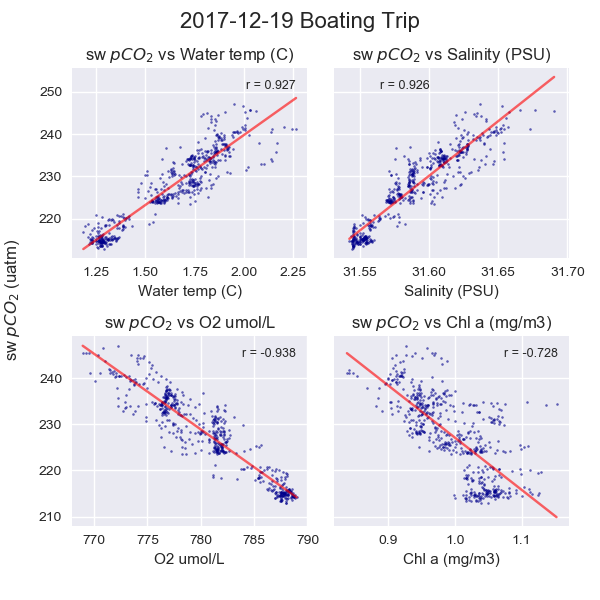

In [28]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharey='row', figsize=(6,6))

axes = [ax1, ax2, ax3, ax4]
for ax, x_col in zip(axes, X_data.columns):
    ax.scatter(X_data[x_col], y_data, c='darkblue', s=2, alpha=0.6)
    
    corr = np.corrcoef(X_data[x_col], y_data)[0, 1]
    ax.set_title('sw $pCO_2$ vs {}'.format(x_col))
    
    # uses legend to place r
    ax.legend(labels=['r = {:0.3f}'.format(corr)], shadow=False, prop={'size': 9})
    leg = ax.get_legend()
    leg.legendHandles[0].set_color('')

    ax.plot(np.unique(X_data[x_col]), np.poly1d(np.polyfit(X_data[x_col], y_data, 1))(np.unique(X_data[x_col])), 
            c='red', 
            alpha=0.6)
    
    ax.set_xlabel(x_col)
    
# sets titles
fig.text(0.02, 0.5, 'sw $pCO_2$ (uatm)', ha='center', va='center', rotation='vertical', fontsize=12)
fig.suptitle('2017-12-19 Boating Trip', fontsize=16)
plt.tight_layout(rect=[0.04, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


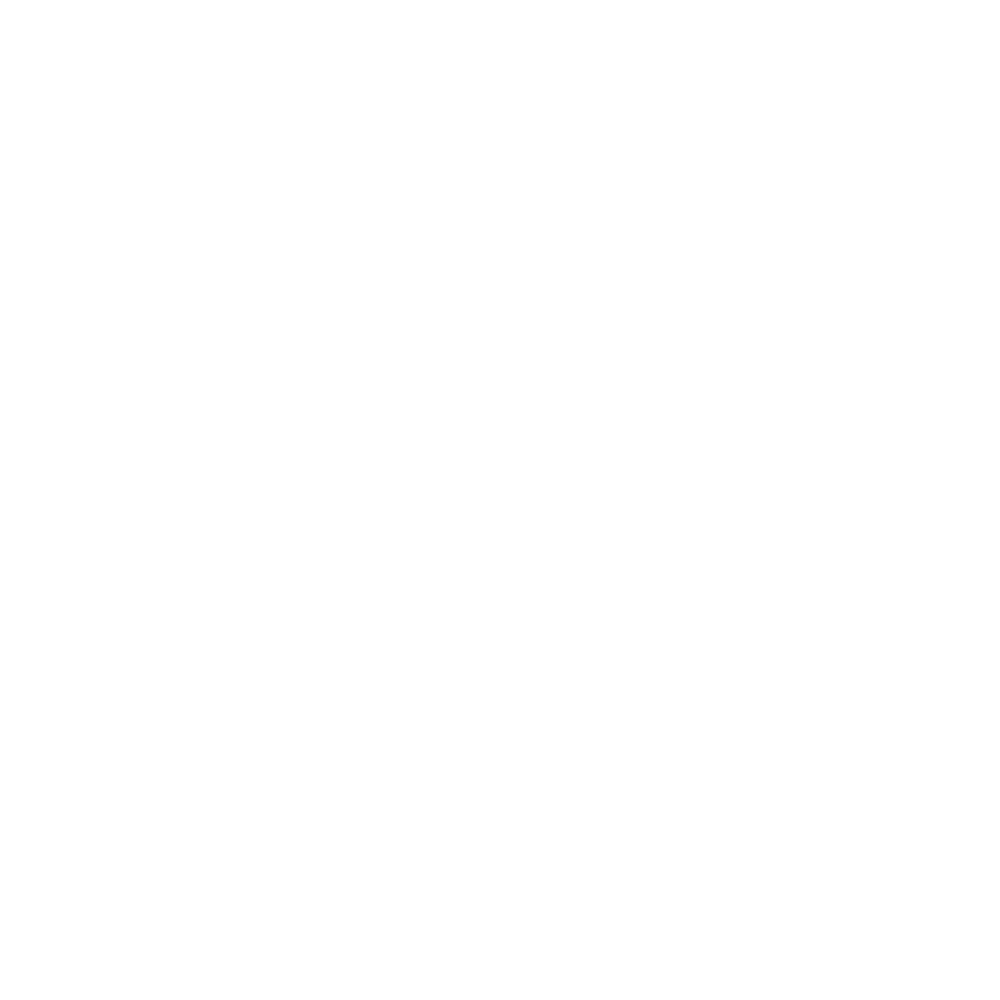

In [7]:
g = sns.pairplot(data_df, size=2, plot_kws=dict(s=5))
# g.map_diag(sns.kdeplot)
# g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

## Exploring other correlations

In [29]:
# calculates R^2
corrs = {}
for c in df.columns:
    df_temp = df[[c, 'sw pCO2 (uatm)']].dropna()
    corr = df_temp.corr().iloc[1, 0] ** 2
    corrs[c] = corr

In [30]:
corr_df = pd.Series(index=list(corrs.keys()), data=list(corrs.values())).dropna()

corr_df.sort_values(ascending=False)

sw pCO2 (uatm)    1.000000
O2 umol/L         0.879494
Water temp (C)    0.859681
Salinity (PSU)    0.857387
Chl a (mg/m3)     0.530686
secDay            0.458514
Lon               0.300605
Lat               0.283431
dtype: float64

In [31]:
df.columns

Index(['Lat', 'Lon', 'secDay', 'Water temp (C)', 'Salinity (PSU)', 'O2 umol/L',
       'Chl a (mg/m3)', 'sw pCO2 (uatm)'],
      dtype='object')

In [32]:
df.loc[:, ['depth (m)', 'sw pCO2 (uatm)']].dropna().corr().iloc[1, 0]

nan

### Standardize data

In [33]:
# normalizes data separately
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [34]:
standardized_data = [scaler.fit_transform(data_df[x_col].reshape(-1, 1)) for x_col in data_df.columns]
standardized_data = np.squeeze(np.array(standardized_data)).T
data_df_standardized = pd.DataFrame(data=standardized_data, columns=data_df.columns, index=data_df.index)

/Users/Mike/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [35]:
data_df_standardized.head()

,Water temp (C),Salinity (PSU),O2 umol/L,Chl a (mg/m3),sw pCO2 (uatm)
133,-0.986182,-0.625552,0.780746,0.860710,-0.735405
134,-1.034266,-0.676537,0.693185,0.992495,-0.771228
135,-0.972935,-0.568127,0.617221,1.069316,-0.826375
136,-0.993559,-0.501311,0.578822,1.231754,-0.820576
137,-0.879699,-0.371270,0.637517,1.238009,-0.807612


# PCA Analysis

explained variance ratio (first three components): [ 0.90411428  0.0747205   0.01304484]


<IPython.core.display.Javascript object>


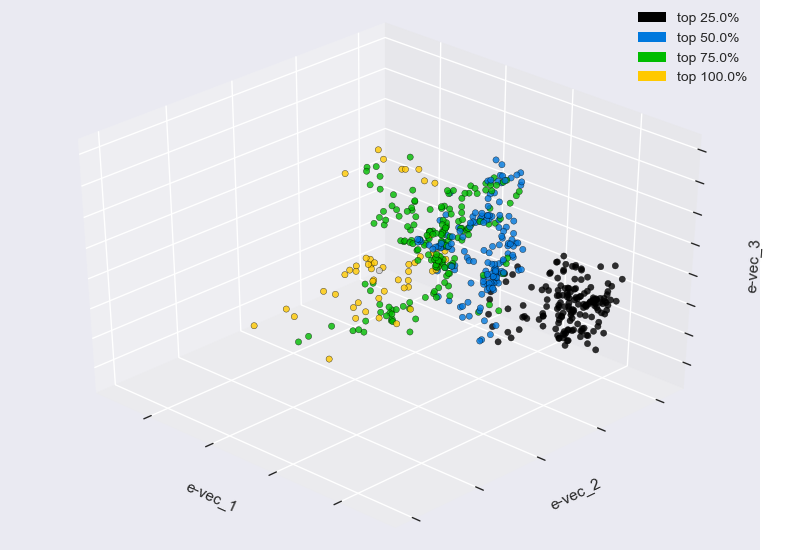

[]

In [46]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm
pca = PCA(n_components=3)

X = data_df_standardized[data_df_standardized.columns[:-1]].values
X = pca.fit_transform(X)
y = data_df_standardized[data_df_standardized.columns[-1]].values

print('explained variance ratio (first three components): {}'.format(pca.explained_variance_ratio_))

fig = plt.figure()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=35, azim=134)

# creates bins for pCO2
num_bins = 4
bins = np.linspace(y.min(), y.max(), num_bins+1)

# sorts color by the quartile the pCO2 data is in
digitized = np.digitize(y, bins)

# chooses colormap
cmap = plt.cm.get_cmap('nipy_spectral')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=digitized, cmap=cmap,
           edgecolor='k', alpha=0.8)

# creates the legend
labels = ['top {:0.1f}%'.format(x) for x in np.linspace(0, 100, num_bins + 1)[1:]]
colors = cmap(np.linspace(0, 1, num_bins+1))  # plus one because who knows
recs = []
for i in range(num_bins):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
ax.legend(recs, labels)

ax.set_xlabel('e-vec_1')
ax.set_ylabel('e-vec_2')
ax.set_zlabel('e-vec_3')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# Clustering on PCA

explained variance ratio (first three components): [ 0.90411428  0.0747205   0.01304484]


<IPython.core.display.Javascript object>


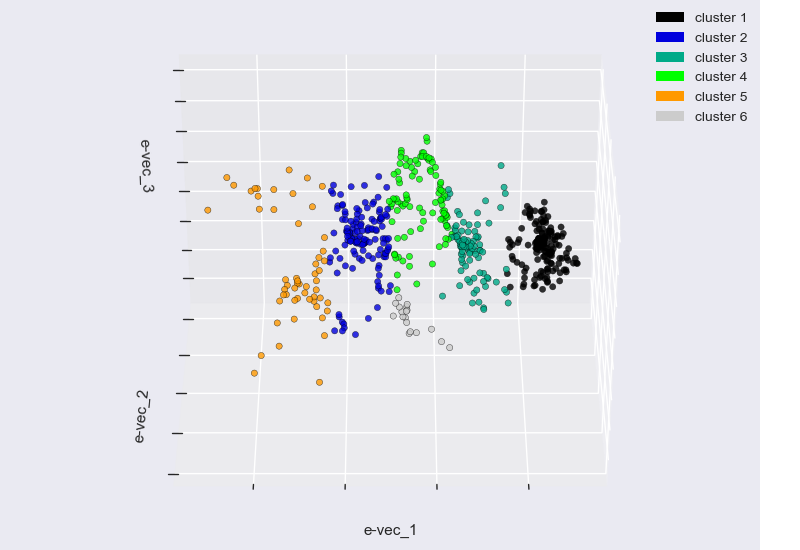

Text(-0.5,-0.5,'explained variance ratio (first three components): [ 0.90411428  0.0747205   0.01304484]')

In [49]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm
pca = PCA(n_components=3)

# Uncomment for standardized values

X = data_df_standardized[data_df_standardized.columns[:-1]].values
X = pca.fit_transform(X)
y = data_df_standardized[data_df_standardized.columns[-1]].values

# Uncomment for original values

# X = data_df[data_df.columns[:-1]].values
# X = pca.fit_transform(X)
# y = data_df[data_df.columns[-1]].values

print('explained variance ratio (first three components): {}'.format(pca.explained_variance_ratio_))

fig = plt.figure()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=35, azim=90)

# clusters the pca results
num_clusters = 6

est = KMeans(n_clusters=num_clusters)
est.fit(X)

# chooses the color map
cmap = plt.cm.get_cmap('nipy_spectral')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=est.labels_, cmap=cmap,
           edgecolor='k', alpha=0.8)

# ax.legend(['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'])

# creates the legend
labels = ['cluster {}'.format(i+1) for i in range(num_clusters)]
colors = cmap(np.linspace(0, 1, num_clusters))
recs = []
for i in range(num_clusters):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
ax.legend(recs, labels)

ax.set_xlabel('e-vec_1')
ax.set_ylabel('e-vec_2')
ax.set_zlabel('e-vec_3')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.annotate('explained variance ratio (first three components): {}'.format(pca.explained_variance_ratio_), xy=(-0.5, -0.5))

## Prints PCA analysis in a readable format

In [50]:
interested_columns = data_df.columns[:-1]
concat_data = np.hstack((pca.explained_variance_ratio_.reshape(-1,1), pca.components_))
pd.DataFrame(data=concat_data, columns=['e-val ratio', *tuple(interested_columns)])

,e-val ratio,Water temp (C),Salinity (PSU),O2 umol/L,Chl a (mg/m3)
0,0.904114,0.514560,0.511116,-0.511181,-0.461175
1,0.074720,0.142784,0.339083,-0.308585,0.877161
2,0.013045,0.817063,-0.176328,0.534888,0.123335


# Function that performs pca and clustering on a dataset

In [51]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches

def pca_clustering(df, num_pca=3, num_clusters=4, standardize=True, cmap=plt.cm.nipy_spectral):

    '''
    df contains all the column data to be performed pca
    '''
    
    # normalizes data separately
    if standardize:
        scaler = StandardScaler()

        standardized_data = [scaler.fit_transform(df[x_col].reshape(-1, 1)) for x_col in df.columns]
        standardized_data = np.squeeze(np.array(standardized_data)).T
        df = pd.DataFrame(data=standardized_data, columns=df.columns, index=df.index)

    pca = PCA(n_components=3)

    X = df.values
    X = pca.fit_transform(X)
#     y = df[data_df.columns[-1]].values

    print('explained variance ratio (first three components): {}'.format(pca.explained_variance_ratio_))

    fig = plt.figure()

    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=35, azim=115)

    # clusters the pca results

    est = KMeans(n_clusters=num_clusters)
    est.fit(X)

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=est.labels_, cmap=cmap,
               edgecolor='k', alpha=0.8)

    # ax.legend(['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'])

    # creates the legend
    labels = ['cluster {}'.format(i+1) for i in range(num_clusters)]
    colors = cmap(np.linspace(0, 1, num_clusters))
    recs = []
    for i in range(num_clusters):
        recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
    ax.legend(recs, labels)

    ax.set_xlabel('e-vec_1')
    ax.set_ylabel('e-vec_2')
    ax.set_zlabel('e-vec_3')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    plt.suptitle('Eigenvalue Ratios: {}'.format(np.around(pca.explained_variance_ratio_, decimals=4)))
    
    plt.tight_layout()
    
    return X, pca, est

explained variance ratio (first three components): [ 0.65463423  0.2321047   0.06615873]


/Users/Mike/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


<IPython.core.display.Javascript object>


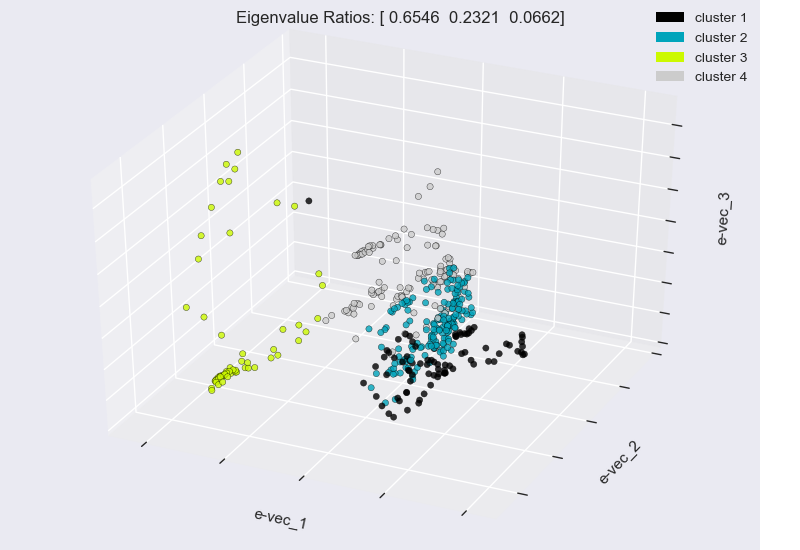

/Users/Mike/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [52]:
X, pca, est = pca_clustering(data_df[data_df.columns[:-1]])

# Gets the optimal number of clusters

### Elbow method

In [ ]:
from scipy.spatial.distance import cdist
K = range(1,10)

X = data_df_standardized[data_df_standardized.columns[:-1]].values
X = pca.fit_transform(X)

distortions = []

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

In [ ]:
plt.figure()
plt.plot(K, distortions, '-o')
plt.plot(4,distortions[3],'ro') 

### MDL Error

In [ ]:
import scipy.cluster.vq as vq
def kmeans_numpy(A, K, whiten=True):

    if whiten:
        W = vq.whiten(A)
    else:
        W = A

    codebook, bookerror = vq.kmeans(W, K)
    codes, error = vq.vq(W, codebook)

    return codebook, codes, error

In [ ]:
def mdl_errors(data, max_K, whiten=True):
    N = data.shape[0]
    
    mdl_errors = []
    for num_of_clusters in range(1, max_K+1):
        _, _, errors = kmeans_numpy(data, num_of_clusters, whiten)        
        mdl = np.sum(np.square(errors)) + num_of_clusters / 2 * np.log2(N)
        mdl_errors.append(mdl)
        
    return mdl_errors

In [ ]:
max_K = 10

plt.figure()
plt.plot(range(max_K), mdl_errors(X, 10), '-o')

### Silhoutte method

In [ ]:
from sklearn.metrics import silhouette_score
K = range(2,10)

X = data_df_standardized[data_df_standardized.columns[:-1]].values
X = pca.fit_transform(X)

distortions = []

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(silhouette_score(X, kmeanModel.labels_))

In [ ]:
plt.figure()
plt.plot(K, distortions, '-o')

In [ ]:
df['secDay'].describe()

In [ ]:
df['secDay'].head(10)

# Modeling original data with clustering

explained variance ratio (first three components): [ 0.68739231  0.25584904  0.04393158]


/Users/Mike/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Mike/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


<IPython.core.display.Javascript object>


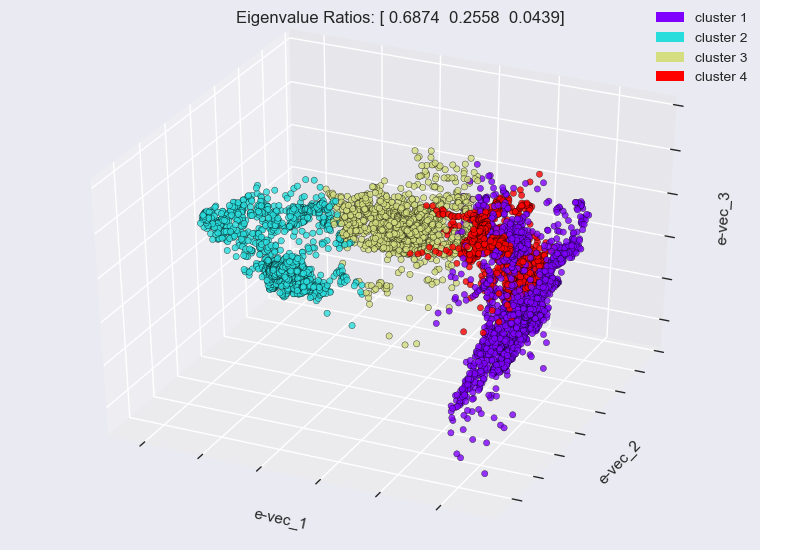

/Users/Mike/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [58]:
np.random.seed(1)
df = pd.read_csv('FLO_L3_20171219_CascoBay_Dec2017_2sec.csv', skiprows=[1])

# filters out all the values that are -9999
df.replace(-9999, np.NaN, inplace=True)

df = df[(df['sw pCO2 (uatm)'] > 100) & 
        (df['sw pCO2 (uatm)'] < 600)]

# bounds df to 300m from the kelp farm
df = df[(df['Lat'] < boundary[0]) & 
        (df['Lat'] > boundary[1]) & 
        (df['Lon'] < boundary[2]) & 
        (df['Lon'] > boundary[3])]

data_df = df[['Water temp (C)', 'Salinity (PSU)', 'O2 umol/L', 'Chl a (mg/m3)', 'sw pCO2 (uatm)']]
data_df.dropna(inplace=True)


X, pca, clust = pca_clustering(data_df[data_df.columns[:-1]], num_clusters=4, standardize=True, cmap=plt.cm.rainbow)

In [59]:
interested_columns = data_df.columns[:-1]
concat_data = np.hstack((pca.explained_variance_ratio_.reshape(-1,1), pca.components_))
pd.DataFrame(data=concat_data, columns=['e-val ratio', *tuple(interested_columns)])

,e-val ratio,Water temp (C),Salinity (PSU),O2 umol/L,Chl a (mg/m3)
0,0.687392,-0.568494,0.186056,0.564448,0.568855
1,0.255849,-0.278990,-0.935266,0.167553,-0.139168
2,0.043932,0.089234,0.200039,0.704384,-0.675177


# Plots clustering in original space

In [288]:
NW = (-70.14655, 43.72273)
NE = (-70.14619, 43.72253)
SE = (-70.14876, 43.72015)
SW = (-70.14911, 43.72035)
corners = [NW, NE, SE, SW]

import matplotlib.lines as mlines

<IPython.core.display.Javascript object>


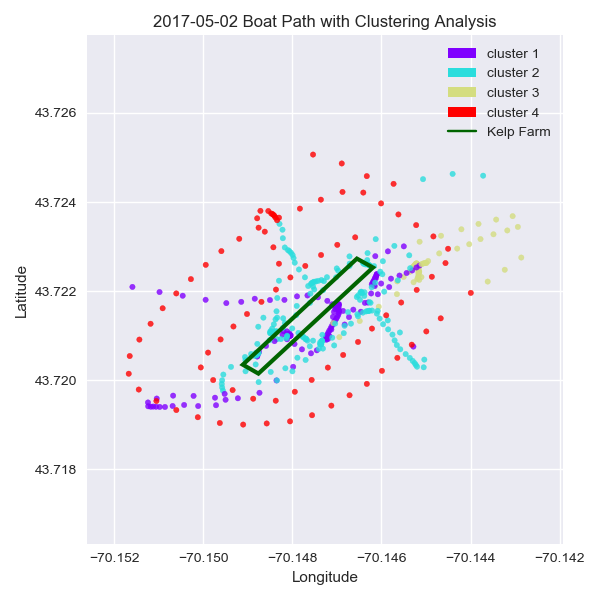

In [289]:
df_graph = df.loc[data_df.index]

fig, ax = plt.subplots(figsize=(6, 6))
# plt.gca().set_aspect('equal', adjustable='box')
# ax.set_xlim(-70.155, -70.140)
# ax.set_ylim(43.718, 43.726)
ax.axis('equal')

cmap = plt.cm.get_cmap('rainbow')
ax.scatter(y=df_graph['Lat'], x=df_graph['Lon'], 
            c=clust.labels_, cmap=cmap, s=15, alpha=0.8)
# adds the location of the farm
ax.add_patch(patches.Polygon(xy=corners, fill=False, edgecolor='darkgreen', linewidth=3))

num_clusters = len(np.unique(clust.labels_))
labels = ['cluster {}'.format(i+1) for i in range(num_clusters)]
colors = cmap(np.linspace(0, 1, num_clusters))
recs = []
for i in range(num_clusters):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))

labels.append('Kelp Farm')    
recs.append(mlines.Line2D([], [], color='darkgreen'))

ax.legend(recs, labels)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('2017-05-02 Boat Path with Clustering Analysis')
plt.tight_layout()

In [273]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Julian Day',
       'secDay', 'Lat', 'Lon', 'Heading', 'Speed (m/s)', 'Water temp (C)',
       'Cond (mmho/cm)', 'Salinity (PSU)', 'CDOM (ppb)', 'Chl a (mg/m3)',
       'Attenuation (c660)', 'O2 umol/L', '% sat O2', 'Pressure (hPa)',
       'sw pCO2 (uatm)', 'fCO2 (uatm)', 'pCO2 (uatm).1', 'fCO2 (uatm).1',
       'Blank'],
      dtype='object')

# Analysis on the May data

In [43]:
df_may = pd.read_csv('FLO_L3_20170502.csv', skiprows=[1])
df_may.replace(-9999, np.NAN, inplace=True)
df_may = df_may[(df_may['sw pCO2 (uatm)'] > 100) & (df_may['sw pCO2 (uatm)'] < 600)]

data_df_may = df_may[['Water temp (C)', 'Salinity (PSU)', 'O2 umol/L', 'Chl a (mg/m3)', 'sw pCO2 (uatm)']]
data_df_may.dropna(inplace=True)

# data_df_may = data_df_may.iloc[2:, :]

/Users/Mike/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [44]:
X_data = data_df_may[data_df_may.columns[:-1]]
y_data = data_df_may[data_df_may.columns[-1]]

<IPython.core.display.Javascript object>


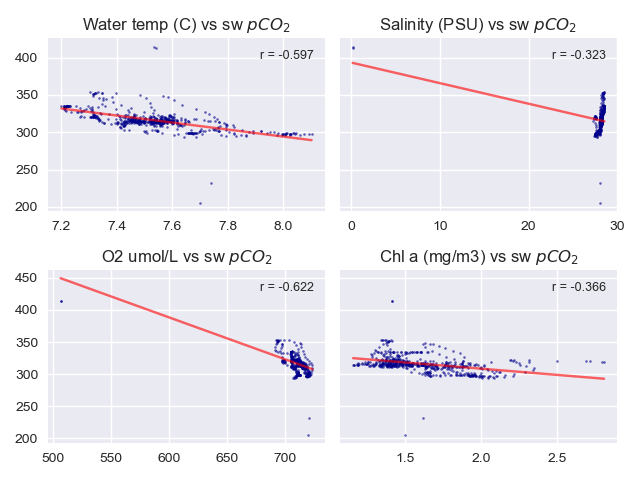

In [45]:

import matplotlib.pyplot as plt


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharey='row')

axes = [ax1, ax2, ax3, ax4]
for ax, x_col in zip(axes, X_data.columns):
    ax.scatter(X_data[x_col], y_data, c='darkblue', s=2, alpha=0.6)
    
    corr = np.corrcoef(X_data[x_col], y_data)[0, 1]
    ax.set_title('{} vs sw $pCO_2$'.format(x_col))
    
    # uses legend to place r
    ax.legend(labels=['r = {:0.3f}'.format(corr)], shadow=False, prop={'size': 9})
    leg = ax.get_legend()
    leg.legendHandles[0].set_color('')

    ax.plot(np.unique(X_data[x_col]), np.poly1d(np.polyfit(X_data[x_col], y_data, 1))(np.unique(X_data[x_col])), 
            c='red', 
            alpha=0.6)
plt.tight_layout()

In [ ]:
data_df_may['sw pCO2 (uatm)'].describe()

In [ ]:
X, pca, clust = pca_clustering(data_df_may.iloc[:, :-1], num_clusters=3, cmap=plt.cm.Set1, standardize=False)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
data_df_may

In [ ]:

df_graph = df.loc[data_df.index]

plt.figure()
# plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_xlim(-70.155, -70.140)
plt.gca().set_ylim(43.716, 43.730)
plt.scatter(y=df_graph['Lat'], x=df_graph['Lon'], 
            c=clust.labels_, cmap=plt.cm.spectral_r, s=5, alpha=0.6)
# cbar.set_label(r'Temperature ($C\degree$)', rotation=270, labelpad=20)
plt.tight_layout()